In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('admission_data.csv')
df

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,...,Fall - 2015,0,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,...,Fall - 2013,0,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,...,Fall - 2015,0,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,...,NaN,NaN,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,...,Fall - 2011,0,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53639,zapp11,Mechanical Engineering,0,24,Thermal Sciences,98.0,MS,Production Engineering,24,12.0,...,Fall - 2014,0,University of Mumbai,NaN,71.00,NaN,100,NaN,Arizona State University,0
53640,zathurian,Electronics and Communication,0,0,Communication,115.0,MS,Electronics and Communication Engineering,30,0.0,...,Fall - 2012,0,BITS Hyderabad,NaN,6.50,NaN,10,NaN,Arizona State University,0
53641,zeal_vyas,Electrical Engineering,0,0,Computer Networks/Telecommunications,NaN,MS,Electronics and Telecommunication,NaN,0.0,...,Fall - 2013,0,NMIMS,NaN,3.55,NaN,4,NaN,Arizona State University,0
53642,zidanefaraday,Electrical Engineering,0,0,Power System Electric Machinery,99.0,MS,University Institute of Engineering and Techno...,NaN,0.0,...,Fall - 2011,0,Panjab University,NaN,70.50,NaN,100,NaN,Arizona State University,0


# Keep only new format GRE  and TOEFL scores

In [3]:
# Current max. score in GRE for each section is 170
df = df[df['greV']<=170]
df = df[df['greQ']<=170]
# Current min. score in GRE for each section is 130
df = df[df['greV']>=130]
df = df[df['greQ']>=130]

# For Analytical Writing max. score is 6.0
df = df[df['greA']<=6.0]

# Max. score in TOEFL is 120
df = df[df['toeflScore']<=120]
# Min. score in TOEFL is 60
df = df[df['toeflScore']>=60]

# Drop the features that are redundant or contain alot of NaN values

In [4]:
# GMAT score contain majority of NaN values
df = df.drop('gmatA',axis=1)
df = df.drop('gmatQ',axis=1)
df = df.drop('gmatV',axis=1)

# We are keeping the Major in which the applicant did his/her undergraduate so Specialization and Department is redundant
df = df.drop('specialization',axis=1)
df = df.drop('department',axis=1)

# Other redundant features
df = df.drop('program',axis=1)
df = df.drop('toeflEssay',axis=1)
df = df.drop('userProfileLink',axis=1)
df = df.drop('topperCgpa',axis=1)
df = df.drop('termAndYear',axis=1)
df = df.drop('userName',axis=1)

# Keep only the samples that got admit in a university & Keep universities that have around100 admits

In [5]:
# keep only samples that have admit tag
df = df[df['admit'] > 0]
df = df.drop('admit',1)

# List of universities with atleast 100 admits
university_list = list(set(df['univName'].tolist()))
for i in range(len(university_list)):
    if(len(df[df['univName'] == university_list[i]]) < 100):
        df = df[df['univName'] != university_list[i]]

# Convert all cgpa entries to 4-scale CGPA

In [6]:
df['cgpaScale'].value_counts()

10     5782
100    5729
0       367
4       292
5        23
Name: cgpaScale, dtype: int64

In [7]:
gpa = df['cgpa'].tolist()
gpa_scale = df['cgpaScale'].tolist()
for i in range(len(gpa)):
    if gpa_scale[i]==10:             
        gpa[i] = gpa[i]*0.4
    elif gpa_scale[i]==100:           
        gpa[i] = (gpa[i]/9.5)*0.4
    elif gpa_scale[i]==5:
        gpa[i] = gpa[i]*0.8
    elif gpa_scale[i]==0:
        gpa[i] = 0
    else:
        gpa[i] = gpa[i]
df['cgpa_4'] = gpa

In [8]:
df = df.drop('cgpa',axis=1)
df = df.drop('cgpaScale',axis=1)
df = df.dropna()

# Feature selection for classification model using Feature Importance

In [9]:
# one hot encoding the University names which is the target variable
y = df.univName
Y = pd.get_dummies(y)

# Drop university name from dependent variable and one hot encode major & ugCollege 
x = df.drop('univName',axis=1);
X = pd.get_dummies(x)

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

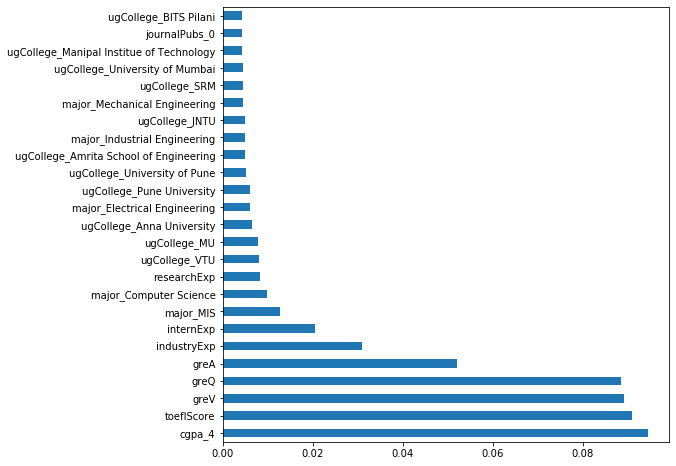

In [12]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(8,8))
plt.show()

# From the graph of importance of features, we observe that: cgpa_4, greV, greQ, greA, toeflScore, industryExp, internExp, researchExp and ugCollege are the most important features

In [13]:
# drop the other features
df = df.drop('major',axis=1)
df = df.drop('journalPubs',axis=1)
df = df.drop('confPubs',axis=1)
df

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,ugCollege,univName,cgpa_4
337,0,24,113.0,2.0,159.0,170.0,4.0,IIT Indore,Virginia Polytechnic Institute and State Unive...,3.080000
338,0,0,102.0,0.0,150.0,167.0,3.0,COEP,Virginia Polytechnic Institute and State Unive...,3.212000
340,12,24,111.0,4.0,158.0,170.0,4.5,NIT Rourkela,Virginia Polytechnic Institute and State Unive...,3.648000
344,0,0,111.0,1.0,152.0,161.0,4.0,SRM,Virginia Polytechnic Institute and State Unive...,3.640000
345,0,27,105.0,0.0,154.0,165.0,3.5,NIT-warangal,Virginia Polytechnic Institute and State Unive...,2.804000
...,...,...,...,...,...,...,...,...,...,...
52583,0,0,92.0,0.0,145.0,161.0,3.0,VTU,Arizona State University,2.989474
52584,0,0,106.0,0.0,151.0,159.0,3.5,SRM,Arizona State University,3.489600
52585,0,0,96.0,0.0,151.0,158.0,3.0,Nagpur University,Arizona State University,3.115789
52586,0,0,113.0,0.0,159.0,163.0,3.5,Osmania University,Arizona State University,3.280000


In [14]:
df['univName'].nunique()

36

# In the final dataset there are 36 different universities, i.e. 36 classes

In [15]:
################################################################################################################################

# Save the cleaned data for exploratory analysis

In [16]:
df.to_csv('admission_data_cleaned.csv',index=False)